# Feature extraction from mobile phone motion sensor data

This notebook attempts to explain how to extract key features from the mobile phone sensor data representing a response to a visual assignment, which requires for the mobile phone to be physically maneuvered either left, right, up, or down.

At $t=0$ a visual stimulus appears on the screen. As the response, a participant (person holding the phone) is required to tilt the phone in a specific direction. Once the roll or picth angle reaches 0.5 radians ($t=T>0$), the movment is completed. $T$ is the event time.

We disregard the third rotational axis because it does not effect the outcome of the task at hand.

### Import the package

Import `DataGenerator` to create simulated data. The class `FeatureExtractor` will be used to extract features from the data.

In [1]:
from tiltx.data_generator import DataGenerator
from tiltx.feature_extractor import FeatureExtractor

### Generate data

The folder `data` contains real-life examples of Euler angles. The sensor data is truncated in such a fashion that we only deal with time serieses collected from the moment a visual stimulus appears till the app registers the move as completed (as soon as either roll or picth angle reaches 0.5 radians.)

In [2]:
t, alpha, beta = DataGenerator.example(1)

By changing $k$ in `DataGenerator.example(k)` we change the example data. The folder `data` provides six examples, i.e., $k \in \{1,2,3,4,5,6\}$.

### Extract features

The inputs to the `FeatureExtractor` class are:
- `t` representing time component
- `alpha` angle along left-right axis
- `beta` angle along up-down axis
- `RT_method` method for finding Reaction Time (either 'cumsum' or 'stationary')
- `correct` the correct/desired direction ('left', 'right', 'up', or 'down')

In [3]:
features = FeatureExtractor(t,alpha,beta,RT_method='cumsum',correct='up')

Let us retrive, for instance, Reaction Time and L1 norms from `features`.

In [4]:
print('Reaction time: %.3f'%(features.RT))
print('L1-norm of the triggering axis: %.3f'%(features.L1_x))
print('L1-norm of the remaining (non-triggering) axis: %.3f'%(features.L1_y))

Reaction time: 0.669
L1-norm of the triggering axis: 0.492
L1-norm of the remaining (non-triggering) axis: 0.006


#### Print features

Let us print all extracted features.

In [5]:
import pandas
data = [[features.RT,features.L1_x,features.L1_y,features.MD_x,features.MD_y,
         features.SE_x,features.SE_y,features.x_flips,features.y_flips]]
key_features = pandas.DataFrame(data, columns=["RT", "L1_x","L1_y","MD_x","MD_y",
                                               "SE_x","SE_y","x_flips","y_flips"])
key_features.style.hide_index()

RT,L1_x,L1_y,MD_x,MD_y,SE_x,SE_y,x_flips,y_flips
0.668854,0.491568,0.00562203,0.0362631,0.00835104,0.0245207,0.038276,3,4


#### Plot the signals

By calling `plot()` function in `FeatureExtractor`, we plot the roll and pitch angles from the moment the stimulus appears till the moment when the app registers the move as completed.

- $x$ is a triggering angle (the one which reaches 0.5 radians first)
- $y$ is the remaining angle
- the shaded regions are proportional to L1 norms
- the black dotted line marks the begining of the reaction

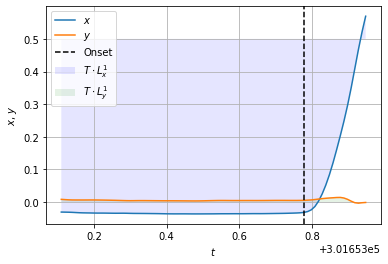

In [6]:
features.plot()